In [1]:
import pandas as pd

In [2]:
data= pd.read_excel('consumption.xlsx')

In [3]:
data.columns

Index(['Movement type', 'Movement Type Text', 'Material Document', 'Material',
       'Posting Date', 'Plant', 'Material Description', 'Valuation Type',
       'Qty in unit of entry', 'Unit of Entry', 'Amt.in Loc.Cur.',
       'Storage location', 'Material Doc.Item', 'User Name', 'Order',
       'WBS element', 'Cost Center'],
      dtype='object')

In [4]:
data.shape

(5783, 17)

In [8]:
data['Material'].nunique()

801

In [56]:
data.head()

,Movement type,Movement Type Text,Material Document,Material,Posting Date,Plant,Material Description,Valuation Type,Qty in unit of entry,Unit of Entry,Amt.in Loc.Cur.,Storage location,Material Doc.Item,User Name,Order,WBS element,Cost Center
0,261.0,GI for order,4.908062e+09,322203016.0,2025-07-02,20D1,"CUP, MUD DIAPHRAGM RUBBER",SPIM-PLNEW,-2.0,NO,-1607.66,RP07,2.0,95833.0,51835422.0,NaN,NaN
1,261.0,GI for order,4.908062e+09,322203725.0,2025-07-02,20D1,DIAPHRAGM PROTECTOR ASSY,SPIM-PLNEW,-2.0,NO,-124332.73,RP07,1.0,95833.0,51835422.0,NaN,NaN
2,261.0,GI for order,4.908062e+09,322213517.0,2025-07-02,20D1,"SEPARATOR,1:1,STD SERV 17-4",SPIM-PLNEW,-1.0,NO,-238384.82,RP07,3.0,95833.0,51835422.0,NaN,NaN
3,261.0,GI for order,4.908059e+09,320000083.0,2025-06-30,20D1,"COUPLER,FEM,17K PSI,1/4"" FNPT",SPIM-PLNEW,-3.0,NO,-20946.17,RP07,13.0,95833.0,51834993.0,NaN,NaN
4,261.0,GI for order,4.908059e+09,320000127.0,2025-06-30,20D1,"LOAD CELL ASSY,4.0""T,F/S",SPIM-PLNEW,-1.0,NO,-266181.39,RP07,6.0,95833.0,51834993.0,NaN,NaN


In [57]:
data['Material'] = data['Material'].astype(str)

In [58]:
data.head()

,Movement type,Movement Type Text,Material Document,Material,Posting Date,Plant,Material Description,Valuation Type,Qty in unit of entry,Unit of Entry,Amt.in Loc.Cur.,Storage location,Material Doc.Item,User Name,Order,WBS element,Cost Center
0,261.0,GI for order,4.908062e+09,322203016.0,2025-07-02,20D1,"CUP, MUD DIAPHRAGM RUBBER",SPIM-PLNEW,-2.0,NO,-1607.66,RP07,2.0,95833.0,51835422.0,NaN,NaN
1,261.0,GI for order,4.908062e+09,322203725.0,2025-07-02,20D1,DIAPHRAGM PROTECTOR ASSY,SPIM-PLNEW,-2.0,NO,-124332.73,RP07,1.0,95833.0,51835422.0,NaN,NaN
2,261.0,GI for order,4.908062e+09,322213517.0,2025-07-02,20D1,"SEPARATOR,1:1,STD SERV 17-4",SPIM-PLNEW,-1.0,NO,-238384.82,RP07,3.0,95833.0,51835422.0,NaN,NaN
3,261.0,GI for order,4.908059e+09,320000083.0,2025-06-30,20D1,"COUPLER,FEM,17K PSI,1/4"" FNPT",SPIM-PLNEW,-3.0,NO,-20946.17,RP07,13.0,95833.0,51834993.0,NaN,NaN
4,261.0,GI for order,4.908059e+09,320000127.0,2025-06-30,20D1,"LOAD CELL ASSY,4.0""T,F/S",SPIM-PLNEW,-1.0,NO,-266181.39,RP07,6.0,95833.0,51834993.0,NaN,NaN


In [9]:
top_materials = data['Material'].value_counts().head(10).index

df_top10 = data[data['Material'].isin(top_materials)]

In [10]:
unit_counts = df_top10.groupby(['Material', 'Unit of Entry']).size().reset_index(name='Count')
print(unit_counts)

      Material Unit of Entry  Count
0   90001043.0            MT    269
1  100000178.0            MT    234
2  100000530.0            MT    195
3  100000550.0            KG    167
4  100101003.0            MT    165
5  100101005.0            KG    226
6  100101210.0            MT    166
7  100101244.0            MT    174
8  100101385.0            MT    154
9  100213267.0            MT    224


In [ ]:
# gota chose one of the materials and build a model! cant build a general solution



df_mt = df_top10[df_top10['Unit of Entry'] == 'MT']
# top3_mt_materials = df_mt['Material'].value_counts().head(3).index

# group by Material and sum total consumption
top3_by_qty = df_mt.groupby('Material')['Qty in unit of entry'].sum().nsmallest(3).index  # use nsmallest because consumption is negative

# filter og data for only those top 3
# data1 = df_mt[df_mt['Material'].isin(top3_mt_materials)]
data1 = df_mt[df_mt['Material'].isin(top3_by_qty)]


In [62]:
data1['Material'].unique()

array(['90001043.0', '100000178.0', '100101003.0'], dtype=object)

In [63]:
data1.shape

(668, 17)

In [64]:
df_model = data1[['Material', 'Posting Date', 'Qty in unit of entry','Amt.in Loc.Cur.']].copy()

In [65]:
df_model.head()

,Material,Posting Date,Qty in unit of entry,Amt.in Loc.Cur.
162,90001043.0,2025-02-21,-0.5,-4718.31
163,90001043.0,2025-02-20,-7.5,-70774.62
164,100000178.0,2025-02-20,-1.0,-42701.55
169,90001043.0,2025-02-19,-18.0,-169859.08
173,100101003.0,2025-02-19,-0.5,-3102.21


In [69]:
df_model.head()

,Material,Posting Date,Qty in unit of entry,Amt.in Loc.Cur.
162,90001043.0,2025-02-21,-0.5,-4718.31
163,90001043.0,2025-02-20,-7.5,-70774.62
164,100000178.0,2025-02-20,-1.0,-42701.55
169,90001043.0,2025-02-19,-18.0,-169859.08
173,100101003.0,2025-02-19,-0.5,-3102.21


In [66]:
df_model = df_model[df_model['Qty in unit of entry'] < 0].copy()

In [67]:
df_model.shape

(650, 4)

In [68]:
df_model['Posting Date'] = pd.to_datetime(df_model['Posting Date'])

In [70]:
df_grouped = df_model.groupby(['Material', 'Posting Date'])['Qty in unit of entry'].sum().reset_index()

In [71]:
df_grouped

,Material,Posting Date,Qty in unit of entry
0,100000178.0,2011-08-25,-1.000
1,100000178.0,2012-02-17,-1.175
2,100000178.0,2013-10-10,-3.000
3,100000178.0,2013-10-17,-1.000
4,100000178.0,2014-03-30,-1.000
...,...,...,...
627,90001043.0,2025-02-17,-25.000
628,90001043.0,2025-02-18,-15.500
629,90001043.0,2025-02-19,-18.000
630,90001043.0,2025-02-20,-7.500


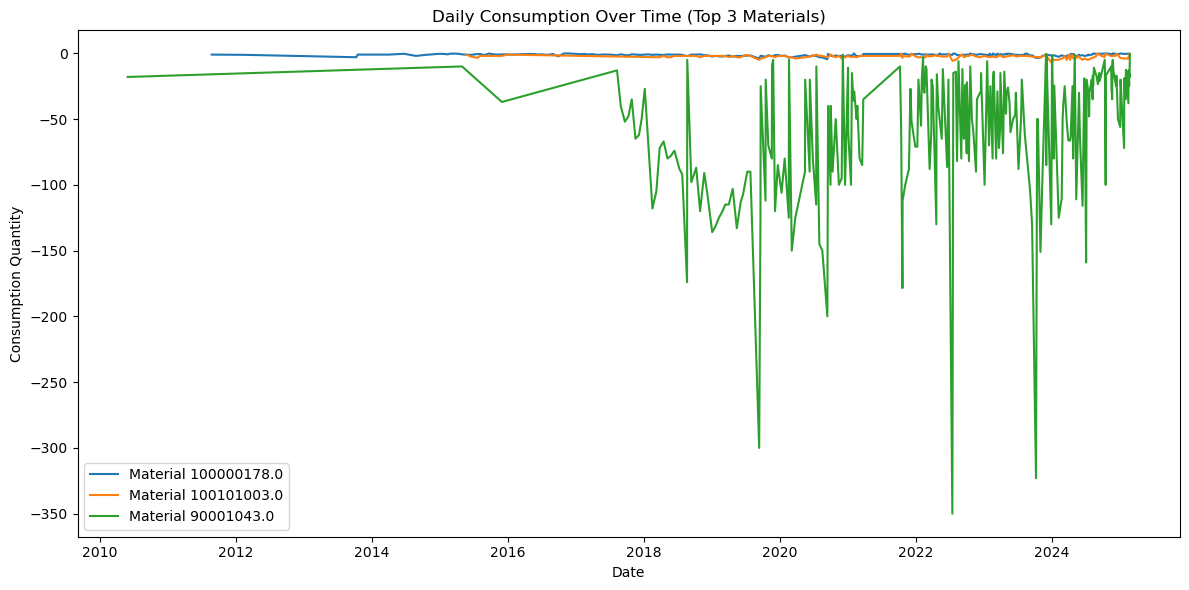

In [74]:
import matplotlib.pyplot as plt

# Plot time series for each material
plt.figure(figsize=(12, 6))

for material in df_grouped['Material'].unique():
    material_data = df_grouped[df_grouped['Material'] == material]
    plt.plot(material_data['Posting Date'], material_data['Qty in unit of entry'], label=f'Material {material}')

plt.xlabel('Date')
plt.ylabel('Consumption Quantity')
plt.title('Daily Consumption Over Time (Top 3 Materials)')
plt.legend()
plt.tight_layout()
plt.show()


In [72]:
df_model = df_model[df_model['Material'] == 90001043.0].copy()